In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [5]:
# URLs for the datasets
customers_url = 'https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/customers_final.csv'
engagements_url = 'https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/engagements_final.csv'
marketing_url = 'https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/marketing_final.csv'
transactions_url = 'https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/transactions_final.csv'

# Reading the datasets
customers = pd.read_csv(customers_url)
engagements = pd.read_csv(engagements_url)
marketing = pd.read_csv(marketing_url)
transactions = pd.read_csv(transactions_url)

# Display the first few rows of each dataset
print("Customers Data:")
print(customers.head())

print("\nEngagements Data:")
print(engagements.head())

print("\nMarketing Data:")
print(marketing.head())

print("\nTransactions Data:")
print(transactions.head())

Customers Data:
   customer_id   join_date last_purchase_date   age  gender           location
0            1  2023-11-20         2024-03-17  56.0  Female  North Shannonbury
1            2  2021-09-08         2023-10-25   NaN    Male          Hillville
2            3  2021-06-01         2022-11-27   NaN     NaN   North Latoyatown
3            4  2022-01-01         2022-09-01  29.0    Male          Grossstad
4            5  2022-01-24         2023-06-02   NaN    Male   East Matthewfort

Engagements Data:
   customer_id  number_of_site_visits  number_of_emails_opened  \
0            1                     10                       15   
1            2                    285                       49   
2            3                    192                       73   
3            4                    110                       30   
4            5                    161                        2   

   number_of_clicks  
0                 1  
1                51  
2                25  
3     

In [6]:
import pandas as pd

# URLs for the datasets
customers_url = 'https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/customers_final.csv'
engagements_url = 'https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/engagements_final.csv'
marketing_url = 'https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/marketing_final.csv'
transactions_url = 'https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/transactions_final.csv'

# Reading the datasets
customers = pd.read_csv(customers_url)
engagements = pd.read_csv(engagements_url)
marketing = pd.read_csv(marketing_url)
transactions = pd.read_csv(transactions_url)

# Convert date columns to datetime format
customers['join_date'] = pd.to_datetime(customers['join_date'])
customers['last_purchase_date'] = pd.to_datetime(customers['last_purchase_date'])
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])
marketing['campaign_date'] = pd.to_datetime(marketing['campaign_date'])


# Merging datasets on 'customer_id'
merged_data = pd.merge(customers, engagements, on='customer_id', how='left')
merged_data = pd.merge(merged_data, marketing, on='customer_id', how='left')
merged_data = pd.merge(merged_data, transactions, on='customer_id', how='left')

# Display the first few rows of the merged dataset
print("\nMerged Data:")
print(merged_data.head())





Merged Data:
   customer_id  join_date last_purchase_date   age  gender           location  \
0            1 2023-11-20         2024-03-17  56.0  Female  North Shannonbury   
1            1 2023-11-20         2024-03-17  56.0  Female  North Shannonbury   
2            1 2023-11-20         2024-03-17  56.0  Female  North Shannonbury   
3            1 2023-11-20         2024-03-17  56.0  Female  North Shannonbury   
4            1 2023-11-20         2024-03-17  56.0  Female  North Shannonbury   

   number_of_site_visits  number_of_emails_opened  number_of_clicks  \
0                     10                       15                 1   
1                     10                       15                 1   
2                     10                       15                 1   
3                     10                       15                 1   
4                     10                       15                 1   

   campaign_id response   promotion_type campaign_date  transaction_id  

In [7]:
merged_data.head()

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_id,response,promotion_type,campaign_date,transaction_id,transaction_date,transaction_amount,product_category
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,No,Buy One Get One,2024-02-29,1,2024-02-03,165.56,Clothing
1,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,No,Buy One Get One,2024-02-29,2,2024-03-02,699.01,Home Goods
2,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,No,Buy One Get One,2024-02-29,3,2024-03-12,146.86,Home Goods
3,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,No,Buy One Get One,2024-02-29,4,2024-01-20,927.46,Electronics
4,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,No,Buy One Get One,2024-02-29,5,2024-02-25,1395.87,Electronics


In [8]:
import pandas as pd

# URLs for the datasets
customers_url = 'https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/customers_final.csv'
engagements_url = 'https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/engagements_final.csv'
marketing_url = 'https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/marketing_final.csv'
transactions_url = 'https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/transactions_final.csv'

# Reading the datasets
customers = pd.read_csv(customers_url)
engagements = pd.read_csv(engagements_url)
marketing = pd.read_csv(marketing_url)
transactions = pd.read_csv(transactions_url)

# Convert date columns to datetime format
customers['join_date'] = pd.to_datetime(customers['join_date'])
customers['last_purchase_date'] = pd.to_datetime(customers['last_purchase_date'])
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])
marketing['campaign_date'] = pd.to_datetime(marketing['campaign_date'])


# Aggregate transactions data by customer_id
agg_transactions = transactions.groupby('customer_id').agg(
    transaction_count=('transaction_id', 'count'),
    total_transaction_amount=('transaction_amount', 'sum'),
    avg_transaction_amount=('transaction_amount', 'mean'),
    last_transaction_date=('transaction_date', 'max')
).reset_index()

# Aggregate marketing data by customer_id
agg_marketing = marketing.groupby('customer_id').agg(
    campaign_count=('campaign_id', 'count'),
    last_campaign_date=('campaign_date', 'max'),
    response_rate=('response', lambda x: (x == 'Yes').mean())
).reset_index()

# Merging datasets on 'customer_id'
merged_data = pd.merge(customers, engagements, on='customer_id', how='left')
merged_data = pd.merge(merged_data, agg_transactions, on='customer_id', how='left')
merged_data = pd.merge(merged_data, agg_marketing, on='customer_id', how='left')

# Display the first few rows of the merged dataset
print("\nMerged Data:")
print(merged_data.head())





Merged Data:
   customer_id  join_date last_purchase_date   age  gender           location  \
0            1 2023-11-20         2024-03-17  56.0  Female  North Shannonbury   
1            2 2021-09-08         2023-10-25   NaN    Male          Hillville   
2            3 2021-06-01         2022-11-27   NaN     NaN   North Latoyatown   
3            4 2022-01-01         2022-09-01  29.0    Male          Grossstad   
4            5 2022-01-24         2023-06-02   NaN    Male   East Matthewfort   

   number_of_site_visits  number_of_emails_opened  number_of_clicks  \
0                     10                       15                 1   
1                    285                       49                51   
2                    192                       73                25   
3                    110                       30                17   
4                    161                        2                 7   

   transaction_count  total_transaction_amount  avg_transaction_amount  

In [12]:
merged_data.head()

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_count,total_transaction_amount,avg_transaction_amount,last_transaction_date,campaign_count,last_campaign_date,response_rate
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,6,3509.48,584.913333,2024-03-12,4,2024-03-05,0.25
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,9,6081.32,675.702222,2023-02-26,4,2023-04-12,0.50
2,3,2021-06-01,2022-11-27,NaN,NaN,North Latoyatown,192,73,25,6,1454.87,242.478333,2022-11-18,2,2022-08-11,0.50
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110,30,17,20,7874.68,393.734000,2022-08-31,4,2022-07-22,0.25
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort,161,2,7,24,15524.55,646.856250,2023-06-01,4,2023-02-28,0.00


In [14]:
merged_data.describe()

,customer_id,join_date,last_purchase_date,age,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_count,total_transaction_amount,avg_transaction_amount,last_transaction_date,campaign_count,last_campaign_date,response_rate
count,10000.00000,10000,10000,8991.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000,10000,10000.000000
mean,5000.50000,2022-03-19 09:28:13.439999744,2023-04-25 18:26:12.480000,43.467467,100.111900,39.862100,19.725300,12.954500,7737.562981,599.842451,2023-03-08 17:50:29.759999744,2.520000,2022-12-18 23:13:12.000000256,0.497192
min,1.00000,2020-01-01 00:00:00,2020-01-26 00:00:00,18.000000,1.000000,1.000000,1.000000,1.000000,23.810000,23.810000,2020-01-26 00:00:00,1.000000,2020-01-16 00:00:00,0.000000
25%,2500.75000,2021-02-15 00:00:00,2022-09-19 00:00:00,30.000000,15.000000,6.000000,3.000000,7.000000,3839.915000,488.343409,2022-07-17 00:00:00,2.000000,2022-03-29 00:00:00,0.250000
50%,5000.50000,2022-03-19 00:00:00,2023-08-04 00:00:00,44.000000,53.000000,22.000000,11.000000,13.000000,7498.890000,587.587333,2023-06-05 00:00:00,3.000000,2023-02-23 12:00:00,0.500000
75%,7500.25000,2023-04-28 00:00:00,2024-02-11 00:00:00,57.000000,141.000000,57.000000,28.000000,19.000000,11275.797500,692.701750,2023-12-31 06:00:00,4.000000,2023-11-02 00:00:00,0.750000
max,10000.00000,2024-05-31 00:00:00,2024-05-31 00:00:00,69.000000,711.000000,303.000000,142.000000,25.000000,24298.220000,1997.080000,2024-05-31 00:00:00,4.000000,2024-05-31 00:00:00,1.000000
std,2886.89568,NaN,NaN,15.094380,118.625052,46.511719,22.975083,7.191203,4628.799469,197.350557,NaN,1.111721,NaN,0.358552


In [9]:
# Display null counts for the merged dataset
print("\nNull counts in merged_data dataset:")
print(merged_data.isnull().sum())


Null counts in merged_data dataset:
customer_id                    0
join_date                      0
last_purchase_date             0
age                         1009
gender                       533
location                       0
number_of_site_visits          0
number_of_emails_opened        0
number_of_clicks               0
transaction_count              0
total_transaction_amount       0
avg_transaction_amount         0
last_transaction_date          0
campaign_count                 0
last_campaign_date             0
response_rate                  0
dtype: int64


In [14]:
# Feature Engineering

# Recency: Days since last purchase
merged_data['recency'] = (merged_data['last_transaction_date'].max() - merged_data['last_purchase_date']).dt.days

# Frequency: Number of transactions
merged_data['frequency'] = merged_data['transaction_count']

# Monetary Value: Total amount spent
merged_data['monetary_value'] = merged_data['total_transaction_amount']

# Tenure: Days since joining
merged_data['tenure'] = (merged_data['last_transaction_date'].max() - merged_data['join_date']).dt.days

# Fill any remaining missing values in engineered features
merged_data.fillna({'frequency': 0, 'monetary_value': 0, 'recency': merged_data['recency'].max(), 'tenure': merged_data['tenure'].max()}, inplace=True)

# Display the first few rows of the dataset with engineered features
print("\nData with Engineered Features:")
print(merged_data.head())



Data with Engineered Features:
   customer_id  join_date last_purchase_date   age  gender           location  \
0            1 2023-11-20         2024-03-17  56.0  Female  North Shannonbury   
1            2 2021-09-08         2023-10-25   NaN    Male          Hillville   
2            3 2021-06-01         2022-11-27   NaN     NaN   North Latoyatown   
3            4 2022-01-01         2022-09-01  29.0    Male          Grossstad   
4            5 2022-01-24         2023-06-02   NaN    Male   East Matthewfort   

   number_of_site_visits  number_of_emails_opened  number_of_clicks  \
0                     10                       15                 1   
1                    285                       49                51   
2                    192                       73                25   
3                    110                       30                17   
4                    161                        2                 7   

   transaction_count  total_transaction_amount  avg_tr

In [15]:
merged_data.describe()

,customer_id,join_date,last_purchase_date,age,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_count,total_transaction_amount,avg_transaction_amount,last_transaction_date,campaign_count,last_campaign_date,response_rate,recency,frequency,monetary_value,tenure
count,10000.00000,10000,10000,8991.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,2022-03-19 09:28:13.439999744,2023-04-25 18:26:12.480000,43.467467,100.111900,39.862100,19.725300,12.954500,7737.562981,599.842451,2023-03-08 17:50:29.759999744,2.520000,2022-12-18 23:13:12.000000256,0.497192,401.231800,12.954500,7737.562981,803.60540
min,1.00000,2020-01-01 00:00:00,2020-01-26 00:00:00,18.000000,1.000000,1.000000,1.000000,1.000000,23.810000,23.810000,2020-01-26 00:00:00,1.000000,2020-01-16 00:00:00,0.000000,0.000000,1.000000,23.810000,0.00000
25%,2500.75000,2021-02-15 00:00:00,2022-09-19 00:00:00,30.000000,15.000000,6.000000,3.000000,7.000000,3839.915000,488.343409,2022-07-17 00:00:00,2.000000,2022-03-29 00:00:00,0.250000,110.000000,7.000000,3839.915000,399.00000
50%,5000.50000,2022-03-19 00:00:00,2023-08-04 00:00:00,44.000000,53.000000,22.000000,11.000000,13.000000,7498.890000,587.587333,2023-06-05 00:00:00,3.000000,2023-02-23 12:00:00,0.500000,301.000000,13.000000,7498.890000,804.00000
75%,7500.25000,2023-04-28 00:00:00,2024-02-11 00:00:00,57.000000,141.000000,57.000000,28.000000,19.000000,11275.797500,692.701750,2023-12-31 06:00:00,4.000000,2023-11-02 00:00:00,0.750000,620.000000,19.000000,11275.797500,1201.00000
max,10000.00000,2024-05-31 00:00:00,2024-05-31 00:00:00,69.000000,711.000000,303.000000,142.000000,25.000000,24298.220000,1997.080000,2024-05-31 00:00:00,4.000000,2024-05-31 00:00:00,1.000000,1587.000000,25.000000,24298.220000,1612.00000
std,2886.89568,NaN,NaN,15.094380,118.625052,46.511719,22.975083,7.191203,4628.799469,197.350557,NaN,1.111721,NaN,0.358552,352.433262,7.191203,4628.799469,466.24581


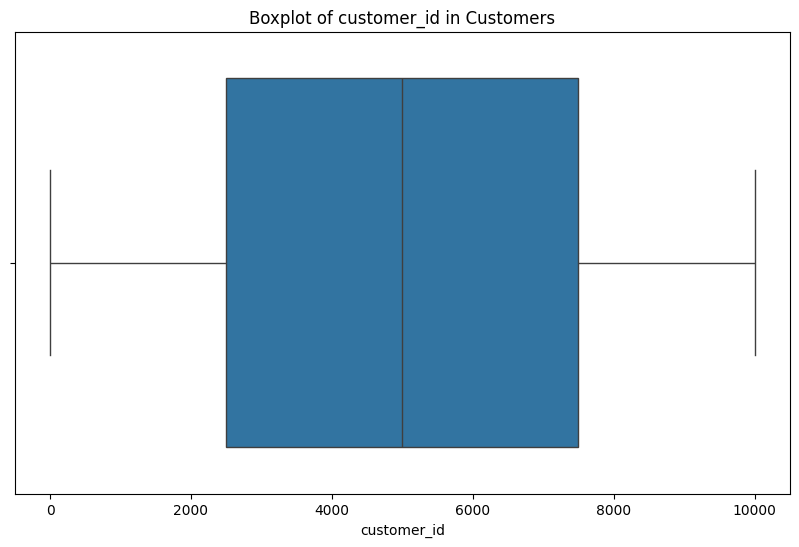

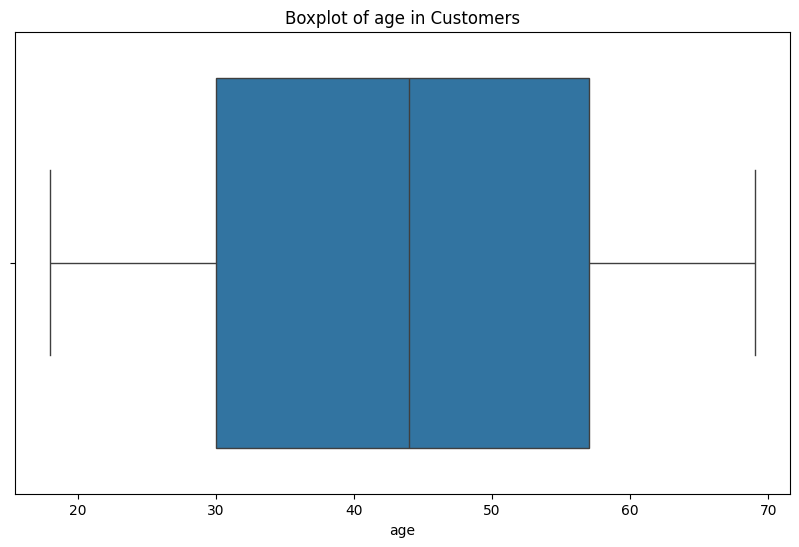

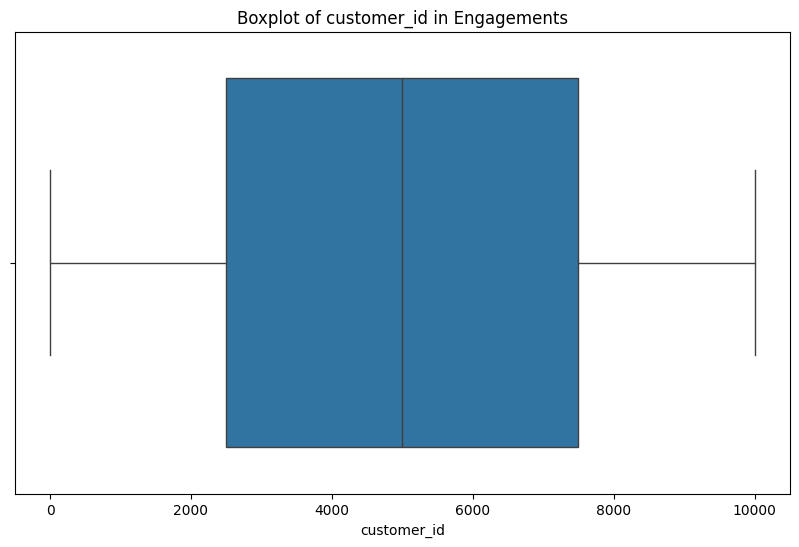

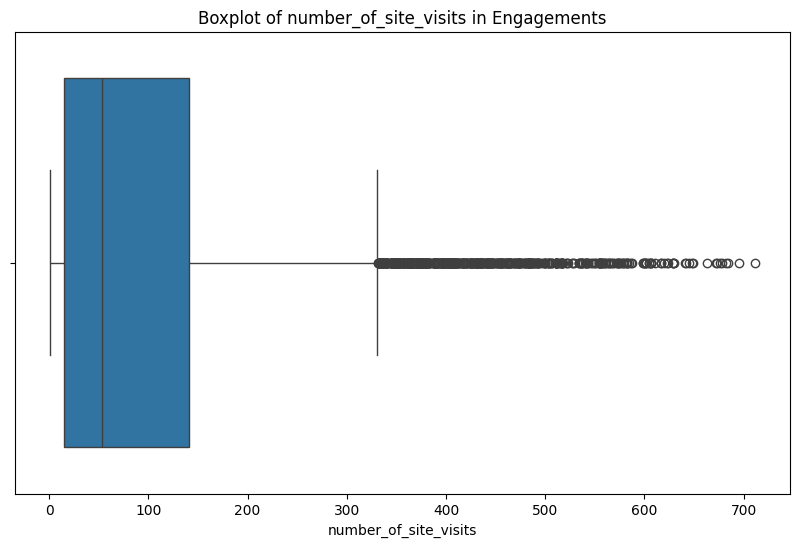

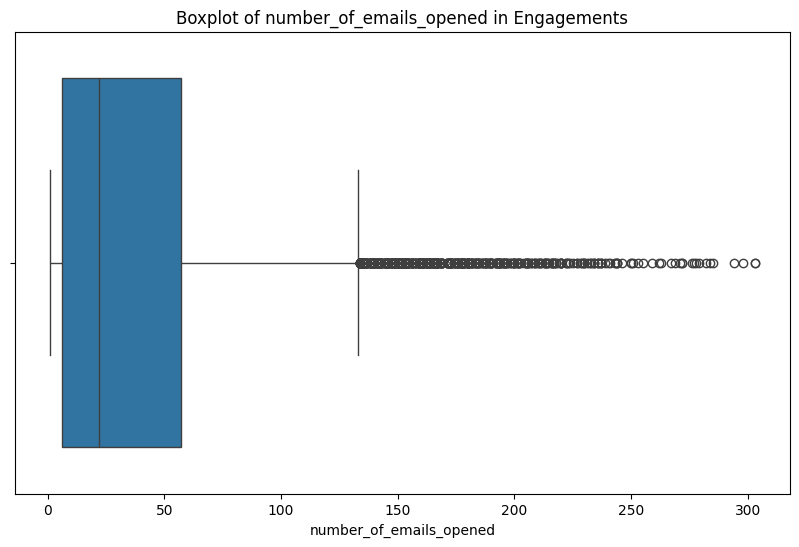

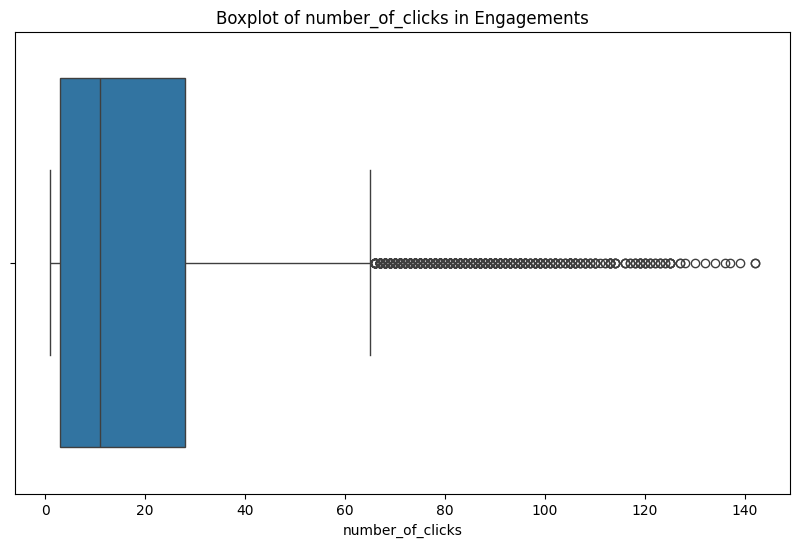

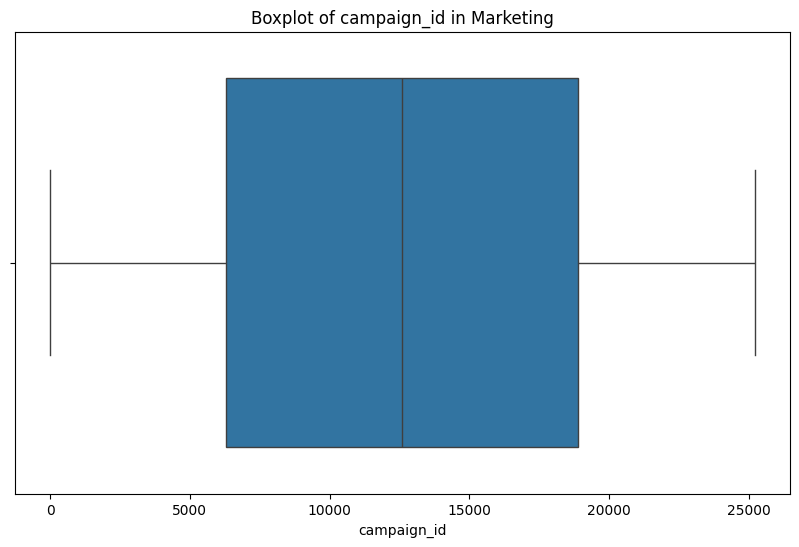

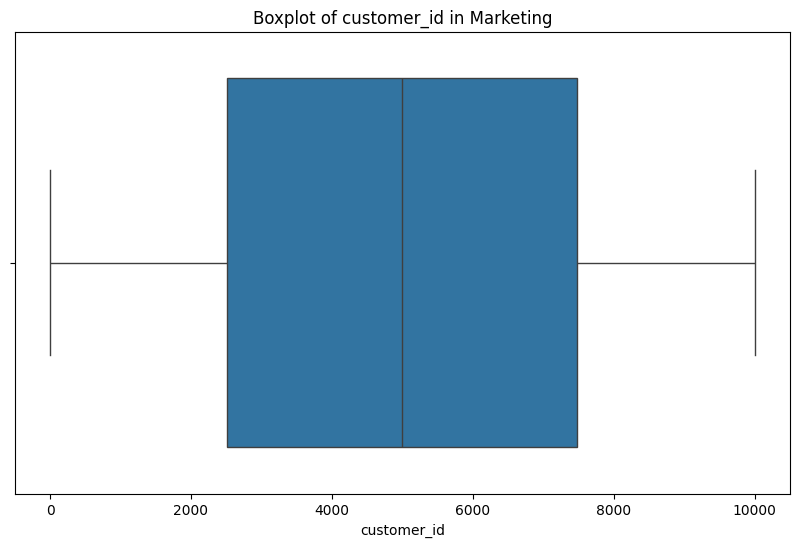

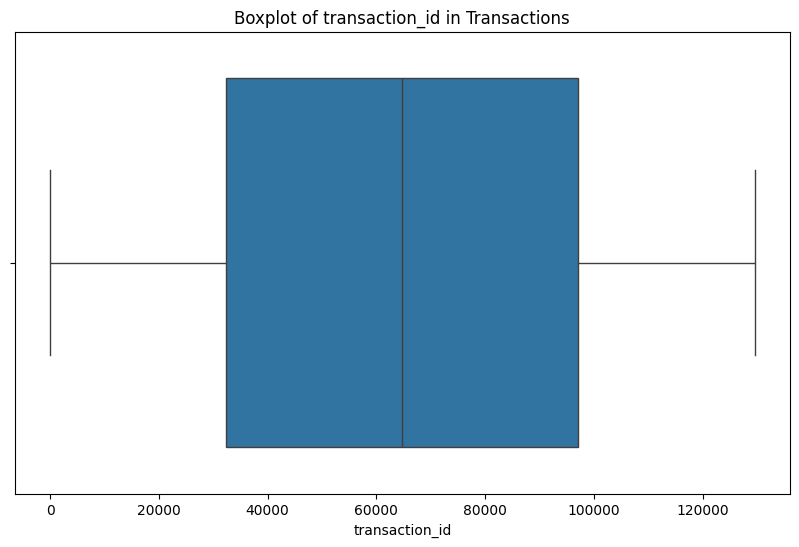

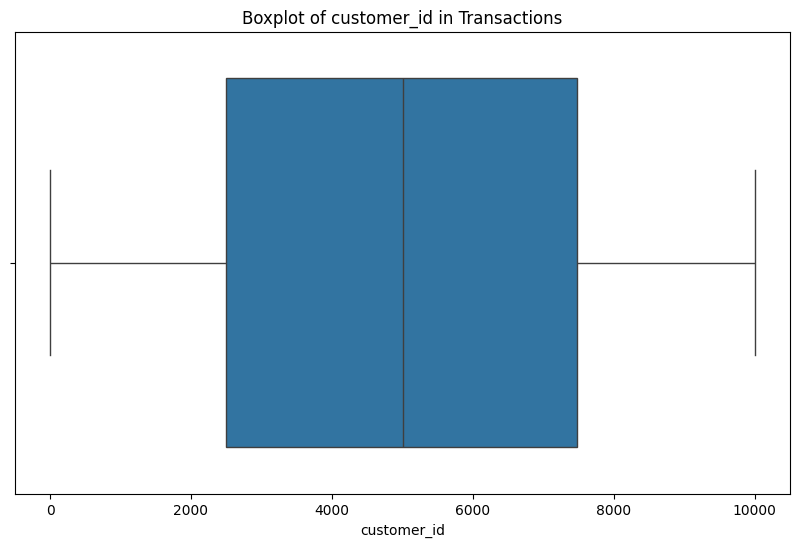

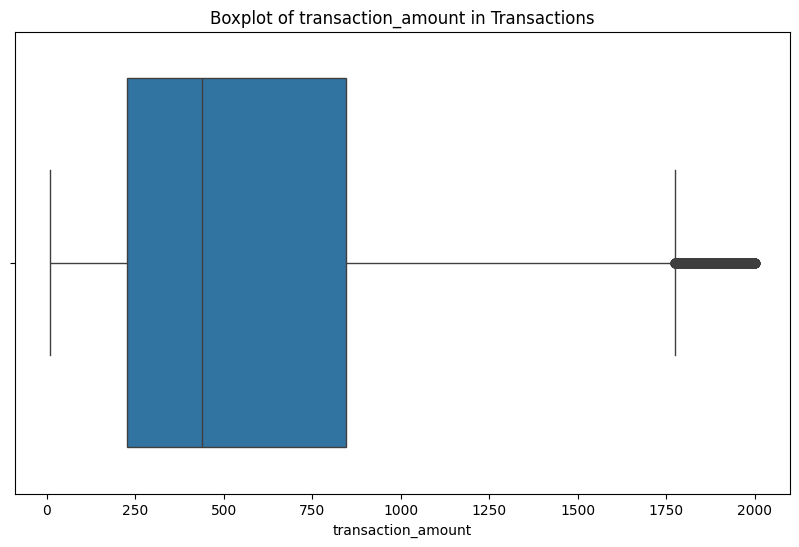

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URLs for the datasets
customers_url = 'https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/customers_final.csv'
engagements_url = 'https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/engagements_final.csv'
marketing_url = 'https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/marketing_final.csv'
transactions_url = 'https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/transactions_final.csv'

# Reading the datasets
customers = pd.read_csv(customers_url)
engagements = pd.read_csv(engagements_url)
marketing = pd.read_csv(marketing_url)
transactions = pd.read_csv(transactions_url)

# Convert date columns to datetime format
customers['join_date'] = pd.to_datetime(customers['join_date'])
customers['last_purchase_date'] = pd.to_datetime(customers['last_purchase_date'])
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])
marketing['campaign_date'] = pd.to_datetime(marketing['campaign_date'])

# Function to create boxplots for numerical columns
def create_boxplots(df, title):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col} in {title}')
        plt.show()

# Create boxplots for numerical columns in each dataset
create_boxplots(customers, 'Customers')
create_boxplots(engagements, 'Engagements')
create_boxplots(marketing, 'Marketing')
create_boxplots(transactions, 'Transactions')
